In [2]:
# 라이브러리 - pandas 
# import pandas
import pandas as pd
# pandas를 불러오면서 pd라고 부르겠다고 설정

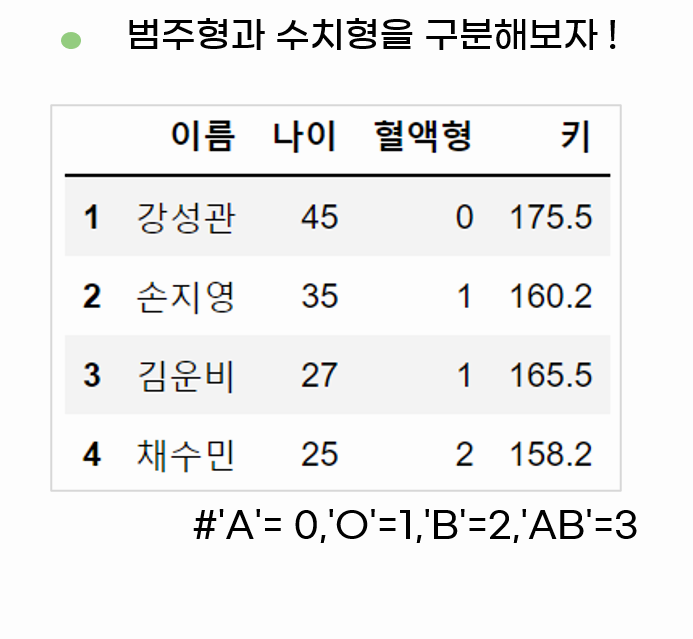

In [3]:
info = pd.DataFrame({'이름':['김주영','김성수','이혜민','박형빈'],
                    '혈액형':[1,3,0,1],
                    '나이':[25,27,17,20],
                    '키':[180.1,175.5,162.5,168.3]})
info

,이름,혈액형,나이,키
0,김주영,1,25,180.1
1,김성수,3,27,175.5
2,이혜민,0,17,162.5
3,박형빈,1,20,168.3


In [ ]:
# 범주형 : 이름, 혈액형 
# 수치형 : 나이, 키 

In [5]:
# 범주형 데이터 다루기
# 빈도값(최빈값)
# 혈액형 특성(변수, 특징, 열) 인덱싱하여 값을 카운팅해보기
info['혈액형'].value_counts()
# loc, iloc

1    2
0    1
3    1
Name: 혈액형, dtype: int64

#### 데이터 접근 방법(인덱싱, 슬라이싱)
- 행과 열에 조금 더 편하게 접근하게 하려고 loc, iloc
- :(콜론) 모든 것을 다 선택
- loc인덱서 : df.loc[행] , df.loc[:,'혈액형'] , df.loc[행,열]  
  : 눈에 보이는 문자열 그대로 
- iloc인덱서 : df.iloc[행], df.iloc[:,1], df.iloc[행,열]  
  : 인덱스값(숫자)을 입력 

In [9]:
# 혈액형이라는 컬럼에 접근 
display(info.iloc[:,1])
display(info.loc[:,'혈액형'])

0    1
1    3
2    0
3    1
Name: 혈액형, dtype: int64

0    1
1    3
2    0
3    1
Name: 혈액형, dtype: int64

In [10]:
info

,이름,혈액형,나이,키
0,김주영,1,25,180.1
1,김성수,3,27,175.5
2,이혜민,0,17,162.5
3,박형빈,1,20,168.3


In [15]:
# 수치형데이터 접근
# 1. 나이 데이터 접근하여 평균 출력
info['나이'].mean()
# info.loc[:,'나이']
# info.iloc[:, 2]

# 2. 키 데이터 접근하여 최댓값 확인
# 대상.max()
info['키'].max()

# 3. 기술통계 함수 확인해보기
# describe()
info['나이'].describe()
info['키'].describe()

count      4.000000
mean     171.600000
std        7.770886
min      162.500000
25%      166.850000
50%      171.900000
75%      176.650000
max      180.100000
Name: 키, dtype: float64

#### 수치형 자료 형식 변환
- 수치 -> 범주

In [25]:
# 나이라는 컬럼을 연령대별(10대, 20대, 30대)로 변환
info.loc[1,'나이'] = 35
# pd.cut
b = [10,19,29,39] # 구간 설정
l = ['10대','20대','30대']# 구간 이름(라벨) 설정
cut_age = pd.cut(info['나이'], bins = b, labels = l)
cut_age

# cut_age(범주형) : 빈도값(최빈값)- value_counts
cut_age.value_counts()

20대    2
10대    1
30대    1
Name: 나이, dtype: int64

In [28]:
# cut_age 데이터값을 info 데이터프레임에 추가 
info['연령대'] = cut_age
info

,이름,혈액형,나이,키,연령대
0,김주영,1,25,180.1,20대
1,김성수,3,35,175.5,30대
2,이혜민,0,17,162.5,10대
3,박형빈,1,20,168.3,20대


- 범주 -> 숫자형태(기존의 의미는 변하지 않음)

In [34]:
# 이름 컬럼 인덱싱 해보기 !
# map

info['이름_map'] = info['이름'].map({'김주영':1,'김성수':3, 
                                 '이혜민':4, '박형빈':2})
info

# get_dummies() : 원핫인코딩
# 기존 가지고 있던 데이터의 범주를 그대로 컬럼으로 만들어줌
pd.get_dummies(info['이름'])

,김성수,김주영,박형빈,이혜민
0,0,1,0,0
1,1,0,0,0
2,0,0,0,1
3,0,0,1,0


정렬

In [39]:
# 키가 작은 숫자부터 순서대로 배치하면?(오름차순 정렬)
info['키'].sort_values(ascending=True)
# 최소값: 162.5
# 최댓값: 180.1

# 내림 차순 정렬
info['키'].sort_values(ascending=False)

0    180.1
1    175.5
3    168.3
2    162.5
Name: 키, dtype: float64

In [43]:
info

,이름,혈액형,나이,키,연령대,이름_map
0,김주영,1,25,180.1,20대,1
1,김성수,3,35,175.5,30대,3
2,이혜민,0,17,162.5,10대,4
3,박형빈,1,20,168.3,20대,2


In [47]:
info.sort_values(by = ['키','나이'], ascending=False, inplace= False)

,이름,혈액형,나이,키,연령대,이름_map
0,김주영,1,25,180.1,20대,1
1,김성수,3,35,175.5,30대,3
3,박형빈,1,20,168.3,20대,2
2,이혜민,0,17,162.5,10대,4


In [48]:
info

,이름,혈액형,나이,키,연령대,이름_map
0,김주영,1,25,180.1,20대,1
1,김성수,3,35,175.5,30대,3
2,이혜민,0,17,162.5,10대,4
3,박형빈,1,20,168.3,20대,2


#### 대표값
- 평균 mean()

In [52]:
age = [20,20,19,20,21,22,145,147]
s_age = pd.Series(age)
s_age.mean()
# 이 데이터를 대표하고 있다고 볼수있나요 ? 없다
s_age
# 145,147 이상치에 의해서 값이 치우치는 오류가 발생할 확률이 있음 


0     20
1     20
2     19
3     20
4     21
5     22
6    145
7    147
dtype: int64

- 중앙값 median() , 50%

In [54]:
s_age.median()
# 중앙값은 대표값이라고 할 수 있나? 네 

20.5

In [55]:
s_age.describe()

count      8.000000
mean      51.750000
std       58.181367
min       19.000000
25%       20.000000
50%       20.500000
75%       52.750000
max      147.000000
dtype: float64

- 최빈값(자료 중 가장 많은 빈도로 나타나는 값)

In [56]:
s_age.mode()

0    20
dtype: int64

#### 또 다른 데이터 살피는 방법

- 분산: 데이터들이(관측치) 평균에서 평균적으로 얼마나 떨어져 있느냐?  
- 분산이 커진다면, 평균에서 멀리 떨어져있다는 의미
- 분산이 0에 가까우면, 평균 근처에 몰려 있다는 의미
  
* 머신러닝 분산개념 사용: 평균적(예측값)으로 이정도 일거야 예측  
  실제와 예측(평균)값의 차이를 비교 분산  
  오차가 크면 분산값이 큼  
  오차가 작으면 분산이 작음 -> 예측 잘해낸 것  

In [ ]:
# 분산 설명 